**Aufgabe 1**

Implementiere Gauss-Legendre Quadraturformeln für s= 2, 3, 4.

Die Idee ist, dass mithilfe der Nullstellen der Legendre Polynome (orthogonales Funktionensystem auf [-1,1]) besser geeignete Knoten verwendet werden als irgendwelche zufälligen. Durch dies können Polynome vom Grad bis zu 2n-1 exakt bestimmt werden (die tatsächlich höchste möglliche Ordnung).

Die Legendre Polynome sind orthogonaler Fuunktionensatz auf [-1, 1]. In dieser Anwendung wird nicht auf [0, 1] transformiert sondern bei dem Intervall [-1, 1] verweilt. Die Knoten $c_i$ sind hierbei durch $\frac{1}{2}(1-\gamma _i)$ gegeben wobei $\gamma _i$ die Nullstellen des Legendre Polynoms sind. Die Knoten werden hierbei aus numpy.polynomial.legendre.leggaus(s) entnommen wofür das Intervall [-1, 1] notwendig ist. Dies gibt die Knoten und Gewichte der Legendre Polynome aus.

Um ein Integral vom Intervall [a,b] zu bestimmen, muss eine Koordinatentransformation durchgeführt werden:

\begin{equation*}
    \int_a^b f(x)dx \to \int_{-1}^1 f(\tfrac{b-a}{2}\xi + \tfrac{a+b}{2})\tfrac{b-a}{2} d\xi \thickapprox \tfrac{b-a}{2} \sum _{i=1}^s \omega _i f(\tfrac{b-a}{2}\xi _i + \tfrac{a+b}{2})
\end{equation*}

Weiters wird das Intervall [a, b] wieder in N Teilintervalle [xi, xj] unterteilt auf die die Gauss Quadratur angewandt wird. Also ergibt sich:

\begin{equation*}
    \int_a^b f(x)dx \thickapprox \sum _{i=1, j=i+1}^{N} \tfrac{x_j-x_i}{2} \sum _{k=1}^s \omega _k f(\tfrac{x_j-x_i}{2}\xi _k + \tfrac{x_i+x_j}{2})
\end{equation*}


In [8]:
import matplotlib.pyplot as plt 
import numpy as np 

def gauss_legendre(fx, a, b, s, N):
    intervals = np.linspace(a, b, N+1)      # Um N Teilintervalle zu erhalten müssen N+1 Punkte verwendet werden
    total_sum = 0

    for i in range(N):
        x_i = intervals[i]
        x_j = intervals[i+1]
        sub_sum = 0

        node, weight = np.polynomial.legendre.leggauss(s)

        for k in range(s):
            sub_sum += weight[k] * fx(((x_j-x_i)/2)*node[k] + (x_i+x_j)/2)
        
        total_sum += sub_sum * (x_j-x_i)/2  

    return total_sum

# Funktion definieren
f = lambda x: np.cos(x) * np.exp(np.sin(x))

# Analytischer Wert der Funktion
analytical_value = np.exp(np.sin(3)) - 1

# Ausgabe der Werte
print('Für s = 2 ist der Wert:', gauss_legendre(f, 0, 3, 2, 2))
print('Für s = 3 ist der Wert:', gauss_legendre(f, 0, 3, 3, 2))
print('Für s = 4 ist der Wert:', gauss_legendre(f, 0, 3, 4, 2))

print('Das analytische Ergebnis lautet:', analytical_value)


Für s = 2 ist der Wert: 0.15991712368966793
Für s = 3 ist der Wert: 0.15092943331131692
Für s = 4 ist der Wert: 0.15159014592417686
Das analytische Ergebnis lautet: 0.15156283651453495


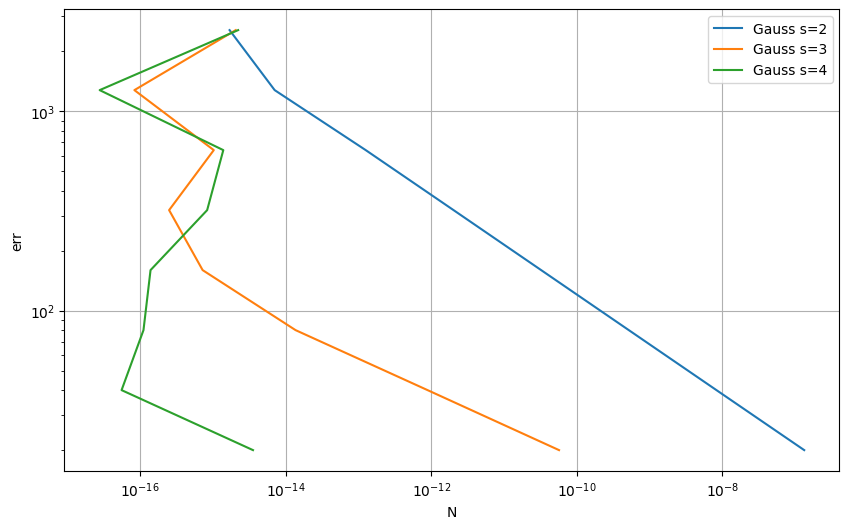

In [9]:

n_vals = np.array([20, 40, 80, 160, 320, 640, 1280, 2560])

err_s_2 = []
err_s_3 = []
err_s_4 = []

for i in range(len(n_vals)):
    err_s_2.append(abs(gauss_legendre(f, 0, 3, 2, n_vals[i]) - analytical_value))
    err_s_3.append(abs(gauss_legendre(f, 0, 3, 3, n_vals[i]) - analytical_value))
    err_s_4.append(abs(gauss_legendre(f, 0, 3, 4, n_vals[i]) - analytical_value))

plt.figure(figsize=(10, 6))
plt.loglog(err_s_2, n_vals,  label='Gauss s=2')
plt.loglog(err_s_3, n_vals,  label='Gauss s=3')
plt.loglog(err_s_4, n_vals,  label='Gauss s=4')


plt.xlabel('N')
plt.ylabel('err')
plt.legend()
plt.grid(True)
plt.show()



**Aufgabe 2**

Genauigkeits Aufwandsdiagramm für 

\begin{equation*}
    f1(x)=:\int _0^2 \frac{cos(x)}{\sqrt{x}}  \text{  und  } f2(x)=: \int_0^2 \sqrt{x}sin(x)
\end{equation*}

In [10]:
f1 = lambda x: np.cos(x)/np.sqrt(x)
f2 = lambda x: np.sqrt(x)*np.sin(x)

# exact_value_f1 = gauss_legendre(f1, a = 0, b = 2, s = 3, N = 100000)
# exact_value_f2 = gauss_legendre(f2, a = 0, b = 2, s = 3, N = 100000)
# 
# print(exact_value_f1)
# print(exact_value_f2)



In [11]:


exact_value_f1 = 1.888249033694514 # aus online Integralrechner 'integralgrechner.de'
exact_value_f2 = 1.532645017030885 # aus online Integralrechner 'integralgrechner.de'

# alternativ mit scipy.quad

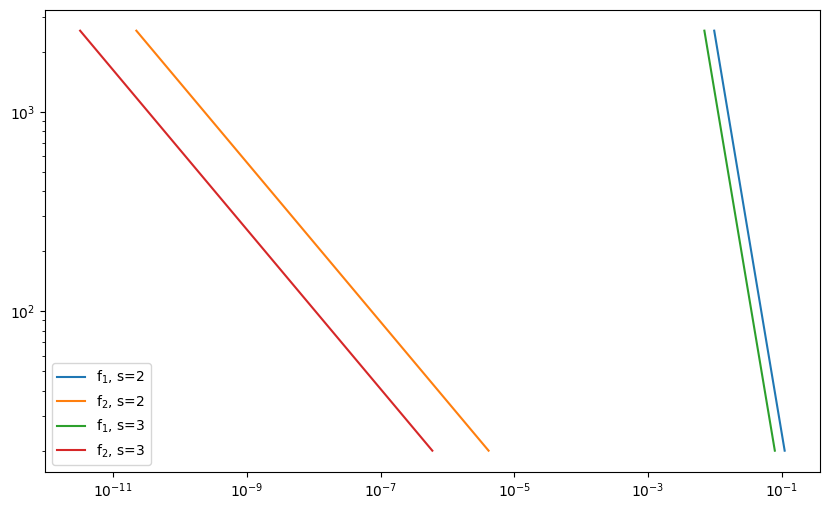

In [14]:
f1_err_s2 = []
f2_err_s2 = []
f1_err_s3 = []
f2_err_s3 = []



for i in range(len(n_vals)):
    f1_err_s2.append(abs(gauss_legendre(f1, 0, 2, 2, n_vals[i]) - exact_value_f1))
    f2_err_s2.append(abs(gauss_legendre(f2, 0, 2, 2, n_vals[i]) - exact_value_f2))
    f1_err_s3.append(abs(gauss_legendre(f1, 0, 2, 3, n_vals[i]) - exact_value_f1))
    f2_err_s3.append(abs(gauss_legendre(f2, 0, 2, 3, n_vals[i]) - exact_value_f2))


plt.figure(figsize=(10, 6))
plt.loglog(f1_err_s2, n_vals, label = r'f$_1$, s=2')
plt.loglog(f2_err_s2, n_vals, label = r'f$_2$, s=2')
plt.loglog(f1_err_s3, n_vals, label = r'f$_1$, s=3')
plt.loglog(f2_err_s3, n_vals, label = r'f$_2$, s=3')

plt.legend()


Nun wird $x $ mit $u^2$ substituiert. Das ergibt für f $ _1$:

\begin{equation*}
    \int_0^2 \frac{cos(x)}{\sqrt{x}} dx= 2\cdot \int_0^{\sqrt{2}}cos(u^2)du
\end{equation*}

und für f $ _2$ ergibt sich:

\begin{equation*}
    \int_0^2 sin(x) \cdot \sqrt{x} dx= 2\cdot \int_0^{\sqrt{2}}u^2 \cdot sin(u^2)du
\end{equation*}

die Berechnungen werden nun erneut durchgeführt.

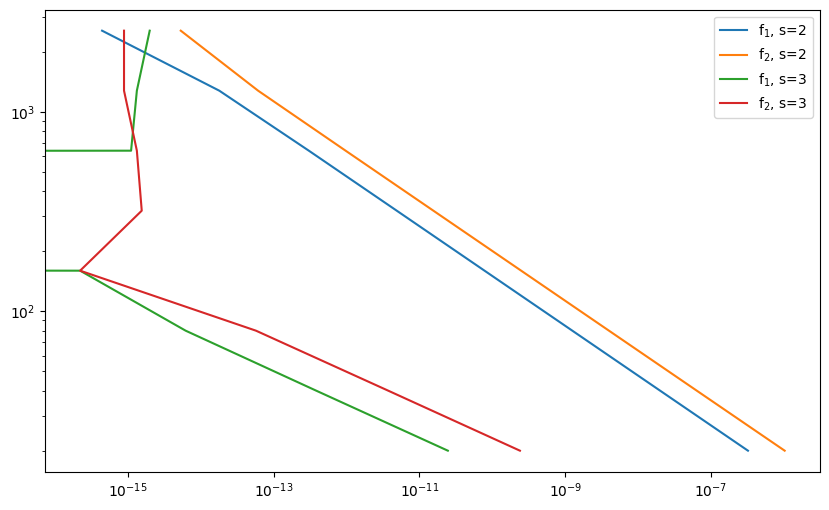

In [15]:
f1_subst = lambda u: 2*np.cos(u**2)
f2_subst = lambda u: 2*(u**2)*np.sin(u**2)

f1_subst_err_s2 = []
f2_subst_err_s2 = []
f1_subst_err_s3 = []
f2_subst_err_s3 = []



for i in range(len(n_vals)):
    f1_subst_err_s2.append(abs(gauss_legendre(f1_subst, 0, np.sqrt(2), 2, n_vals[i]) - exact_value_f1))
    f2_subst_err_s2.append(abs(gauss_legendre(f2_subst, 0, np.sqrt(2), 2, n_vals[i]) - exact_value_f2))
    f1_subst_err_s3.append(abs(gauss_legendre(f1_subst, 0, np.sqrt(2), 3, n_vals[i]) - exact_value_f1))
    f2_subst_err_s3.append(abs(gauss_legendre(f2_subst, 0, np.sqrt(2), 3, n_vals[i]) - exact_value_f2))


plt.figure(figsize=(10, 6))
plt.loglog(f1_subst_err_s2, n_vals, label = r'f$_1$, s=2')
plt.loglog(f2_subst_err_s2, n_vals, label = r'f$_2$, s=2')
plt.loglog(f1_subst_err_s3, n_vals, label = r'f$_1$, s=3')
plt.loglog(f2_subst_err_s3, n_vals, label = r'f$_2$, s=3')

plt.legend()


Es ist sehr eindeutig ersichtlich, dass die Variablentransformation und die einhergehende Abschaffung der Singularitäten das Ergebnis deutlich verbessert. Dies passiert dadurch, dass nun keine Divisionen durch fast null bzw multiplikationen mit fast null stattfinden.